In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir -p ~/.kaggle

In [3]:
!cp /content/drive/MyDrive/ML_Projects/kaggle.json ~/.kaggle/kaggle.json

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

100% 2.04G/2.04G [01:34<00:00, 23.4MB/s]
100% 2.04G/2.04G [01:34<00:00, 23.1MB/s]


In [6]:

import os
import json
from zipfile import ZipFile
from PIL import Image
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [7]:
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [8]:
base_dir = 'plantvillage dataset/color'

In [9]:
from PIL import Image

(256, 256, 3)


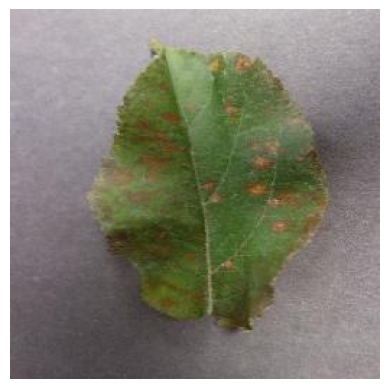

In [10]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/0340baaa-e9cc-4c04-8f9b-c204180d9ae3___FREC_C.Rust 3805.JPG'


img = mpimg.imread(image_path)

print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [11]:
img_size = 224
batch_size = 32

In [12]:
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [13]:
train_gen = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset = "training",
    class_mode = "categorical"
)

Found 43456 images belonging to 38 classes.


In [14]:
valition_gen = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset = "validation",
    class_mode = "categorical"
)

Found 10849 images belonging to 38 classes.


In [15]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_gen.num_classes, activation='softmax'))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:

history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // batch_size,
    epochs=7,
    validation_data=valition_gen,
    validation_steps=valition_gen.samples // batch_size
)

Epoch 1/7
1358/1358 [==============================] - 113s 83ms/step - loss: 0.0480 - accuracy: 0.9846 - val_loss: 0.5477 - val_accuracy: 0.8797
Epoch 2/7
1358/1358 [==============================] - 108s 80ms/step - loss: 0.0572 - accuracy: 0.9836 - val_loss: 0.7271 - val_accuracy: 0.8611
Epoch 3/7
1358/1358 [==============================] - 111s 82ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.7292 - val_accuracy: 0.8576
Epoch 4/7
1358/1358 [==============================] - 113s 83ms/step - loss: 0.0412 - accuracy: 0.9878 - val_loss: 0.5369 - val_accuracy: 0.9000
Epoch 5/7
1358/1358 [==============================] - 108s 79ms/step - loss: 0.0318 - accuracy: 0.9908 - val_loss: 0.7691 - val_accuracy: 0.8686
Epoch 6/7
1358/1358 [==============================] - 110s 81ms/step - loss: 0.0360 - accuracy: 0.9899 - val_loss: 1.1107 - val_accuracy: 0.8328
Epoch 7/7
1358/1358 [==============================] - 112s 82ms/step - loss: 0.0353 - accuracy: 0.9908 - val_loss: 0.8874 -

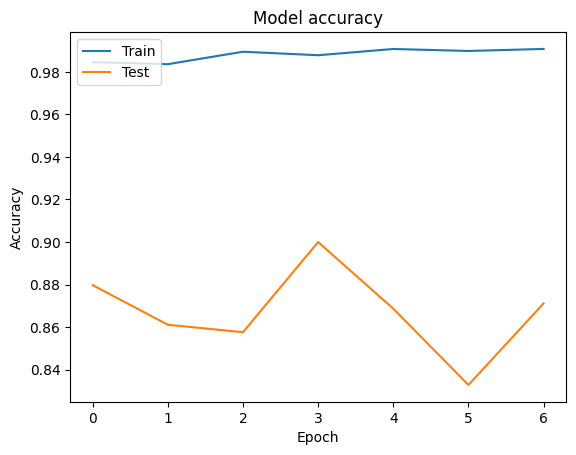

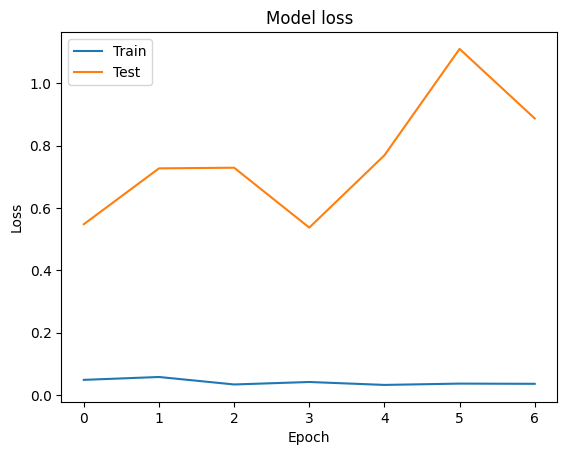

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(valition_gen, steps=valition_gen.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 [==============================] - 19s 57ms/step - loss: 0.8874 - accuracy: 0.8711
Validation Accuracy: 87.11%


In [24]:
import numpy as np

def load_img(img_path,target_size = (224,224)):
  img = Image.open(img_path)
  img = img.resize(target_size)
  img_array = np.array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = img_array.astype('float32') / 255.
  return img_arry

In [25]:
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [27]:
class_indices = {v: k for k, v in train_gen.class_indices.items()}

In [28]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [29]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [31]:

model.save('/content/drive/MyDrive/plant_disease_prediction_model.h5')